In [1]:
import sys
sys.path.append('../SF_history')
import sf_history
sys.path.append('../stats')
import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle
import time

%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
sf_history.load_sf_history()

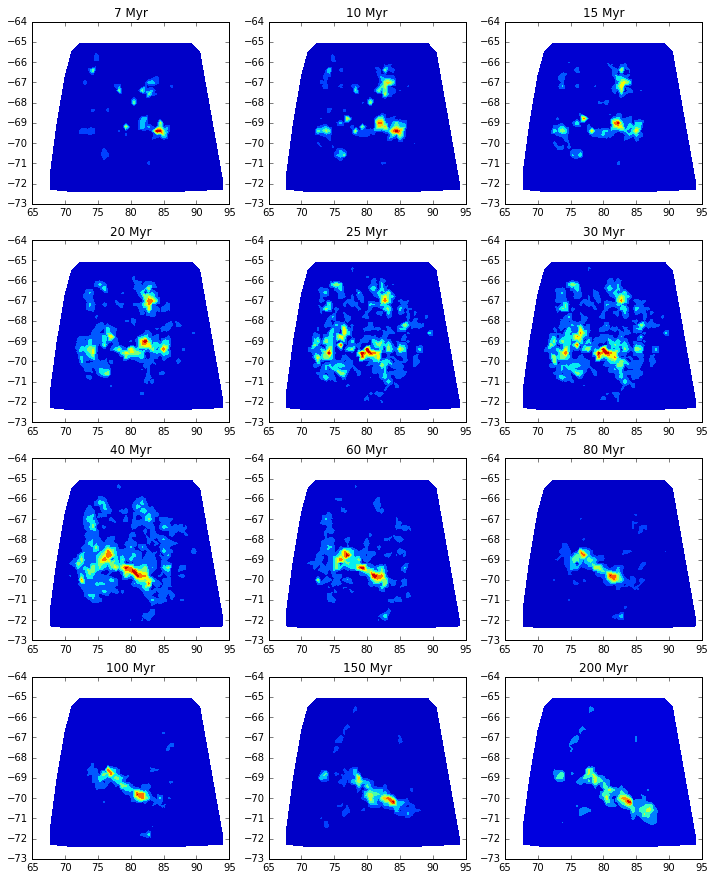

In [3]:
sf_history.test_LMC_SFH_plots()

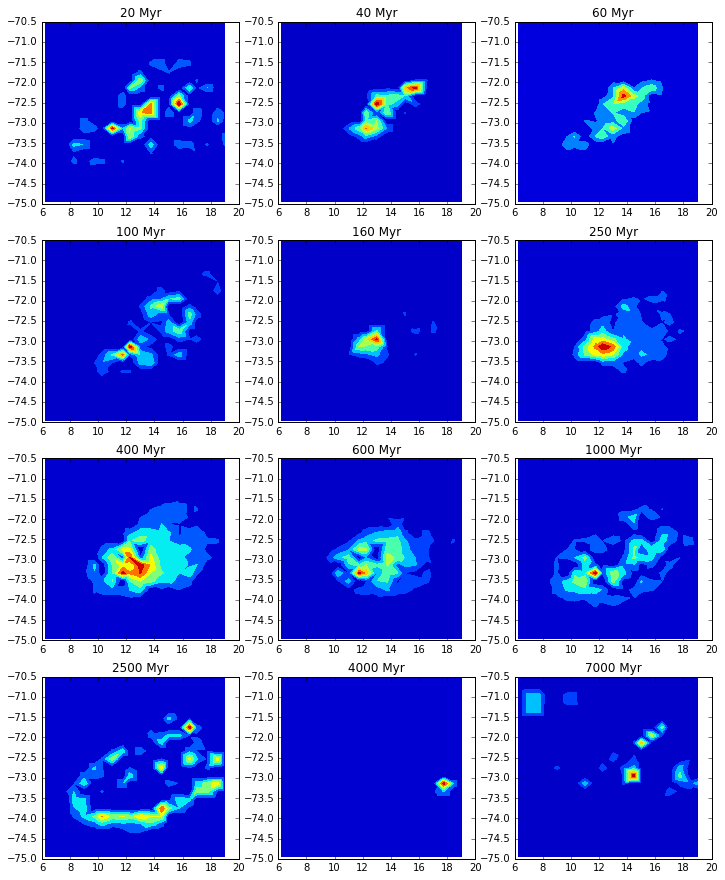

In [4]:
sf_history.test_SMC_SFH_plots()

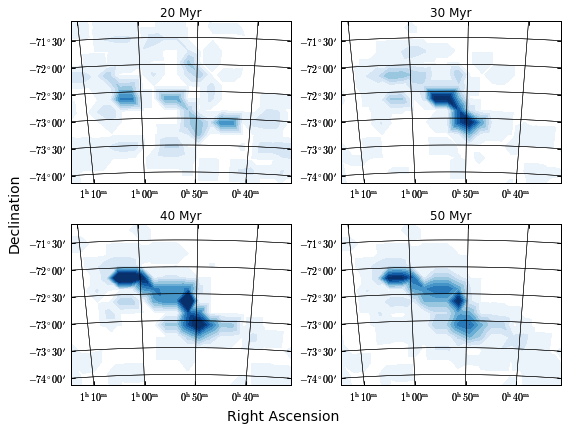

In [3]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rc('font', size=10)

# Remove original x,y ticks
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

# SF history plots
sf_history.get_SMC_plot_polar(20.0, fig_in=fig, rect=221, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(30.0, fig_in=fig, rect=222, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(40.0, fig_in=fig, rect=223, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(50.0, fig_in=fig, rect=224, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)

# Axes labels
fig.text(0.5, 0.02, 'Right Ascension', ha='center', fontsize=14)
fig.text(0.02, 0.5, 'Declination', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.10, left=0.13)


#plt.savefig('../figures/SMC_SF_history.pdf')
plt.show()

In [10]:
sampler = pickle.load( open( "../data/SMC_MCMC_sampler.obj", "rb" ) )
HMXB = pickle.load( open( "../data/SMC_MCMC_HMXB.obj", "rb" ) )

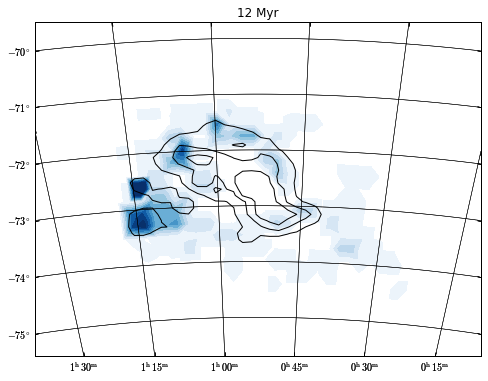

In [16]:
sf_history.get_SMC_plot_polar(12.0, ra_dist=HMXB[0], dec_dist=HMXB[1], xlabel=None, ylabel=None, xwidth=3.0, ywidth=3.0)

plt.show()

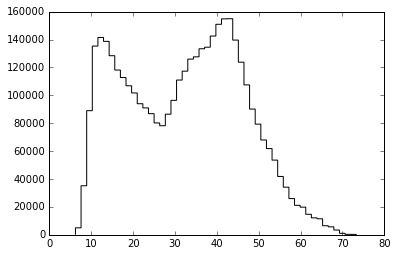

In [17]:
plt.hist(sampler.flatchain.T[9], histtype='step', color='k', bins=50)

plt.show()

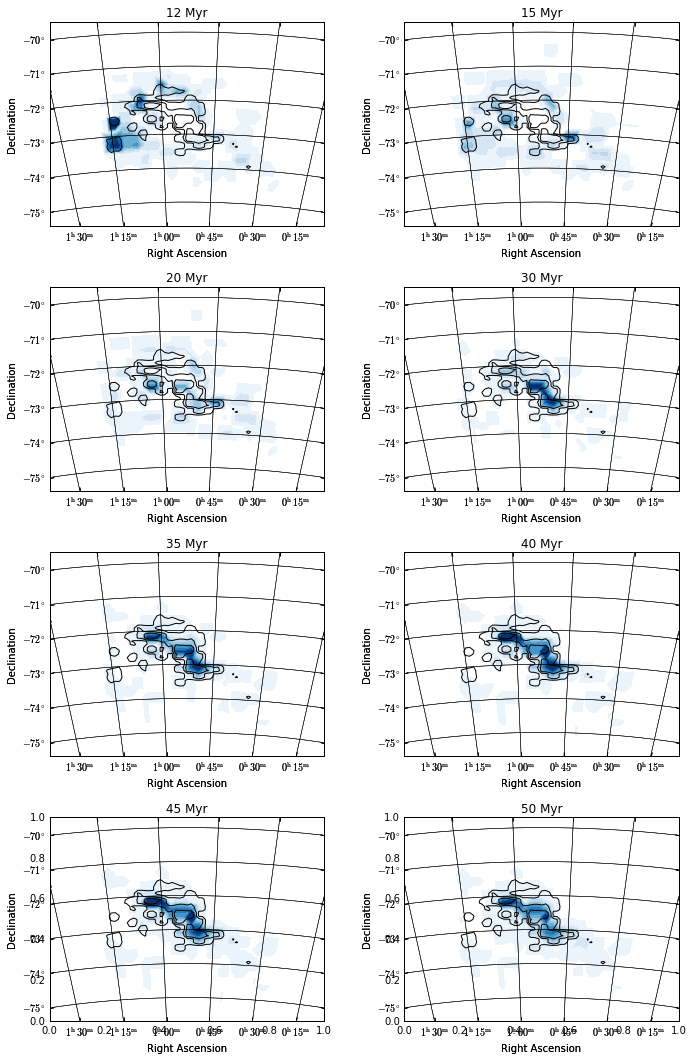

In [18]:
# TEST PLOT

fig, ax = plt.subplots(4,2, figsize=(10,15))

for i in [0,1]:
    for j in [0,1,2]:
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

sf_history.get_SMC_plot_polar(12.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=421)
sf_history.get_SMC_plot_polar(15.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=422)
sf_history.get_SMC_plot_polar(20.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=423)
sf_history.get_SMC_plot_polar(30.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=424)
sf_history.get_SMC_plot_polar(35.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=425)
sf_history.get_SMC_plot_polar(40.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=426)
sf_history.get_SMC_plot_polar(45.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=427)
sf_history.get_SMC_plot_polar(50.0, ra_dist=sampler.flatchain.T[7], dec_dist=sampler.flatchain.T[8], xwidth=3.0, ywidth=3.0, fig_in=fig, rect=428)

plt.tight_layout()
plt.show()

### Profile emcee sampler

In [9]:
import cProfile
cProfile.run('sampler = stats.run_emcee_population(nburn=100, nsteps=1000)')

         66709047 function calls (66563383 primitive calls) in 53.082 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   53.085   53.085 <string>:1(<module>)
    49856    0.009    0.000    0.009    0.000 <string>:2(_parse_args)
     1629    0.000    0.000    0.000    0.000 <string>:5(_parse_args_rvs)
    19612    0.007    0.000    0.011    0.000 <string>:8(__new__)
    49856    0.311    0.000    0.311    0.000 _continuous_distns.py:3128(_pdf)
        1    0.000    0.000    0.000    0.000 _continuous_distns.py:4213(_argcheck)
        1    0.000    0.000    0.000    0.000 _continuous_distns.py:4236(_ppf)
     1629    0.001    0.000    0.014    0.000 _continuous_distns.py:4311(_rvs)
        2    0.000    0.000    0.000    0.000 _continuous_distns.py:84(_norm_cdf)
        1    0.000    0.000    0.000    0.000 _continuous_distns.py:92(_norm_ppf)
        2    0.000    0.000    0.000    0.000 _continuous